# consistency checks for lpm annihilation simulation
Timothy Tyree<br>
3.29.2023

In [1]:
from lib.my_initialization import *

In [2]:
import subprocess

In [3]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

# dev

In [39]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [40]:
!pwd

/Users/timothytyree/Documents/GitHub/bgmc/c/attractive


In [41]:
#compile the executable
os.system('./gcc.sh')

0

In [42]:
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2"
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 2 1 0 0 0 0 1 2"
# func_path = f"{cfolder}/return_CollTime.x"
# f"{func_path} {input_string}"
# # os.system(f"{func_path} {input_string}")
# # os.system(f"{func_path} {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# os.system(f"{func_path} <<< {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# # os.system(f"/return_CollTime.x < 1-control.input | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")

In [76]:
# N0_lst=list(range(2,100,4))
# N0_lst=list(range(2,100,8))
N0_lst=list(range(2,102,2))
# N0_lst

In [52]:
niter=1000
dt=1e-4
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
# seed=1
seed=0
task_lst=[]
# for N0 in range(2,100,2):
for N0 in N0_lst:
    input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} 2"
    call_string = f"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '{input_string}'"
    call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    task_lst.append(call_string)
print(f"{len(task_lst)=}")
call_string

len(task_lst)=50


"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 0 0 0 0 0 0 2' | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"

In [53]:
def routine(call_string):
    return eval(subprocess.check_output(call_string, shell=True))

In [54]:
retval=[]
for call_string in task_lst:
    retval.append(routine(call_string))
len(retval)

50

In [55]:
retval

[0.131322,
 0.0409117,
 0.018264,
 0.0110846,
 0.00836416,
 0.00576834,
 0.00455071,
 0.0036219,
 0.00321197,
 0.00262181,
 0.00227703,
 0.00205087,
 0.0017143,
 0.00162942,
 0.00141236,
 0.00130125,
 0.00117286,
 0.00104599,
 0.00098967,
 0.000942411,
 0.000853312,
 0.000790139,
 0.000704972,
 0.000685969,
 0.000661937,
 0.000608138,
 0.000567319,
 0.00054965,
 0.000528019,
 0.000500825,
 0.000482402,
 0.00045,
 0.000438443,
 0.000424393,
 0.000403722,
 0.000368,
 0.00036871,
 0.000349875,
 0.000342246,
 0.000324769,
 0.000322267,
 0.000290983,
 0.000293666,
 0.000265928,
 0.000275278,
 0.000270404,
 0.00025546,
 0.000247193,
 0.000245141,
 0.000239968]

In [59]:
# #run daskbag
# printing=True
# max_num_jobs=os.cpu_count()-1
# npartitions=np.min((len(task_lst),max_num_jobs))
# if printing:
#     print(f"running {len(task_lst)} tasks over {npartitions} cpu cores...")
# retval=eval_routine_daskbag(routine,task_lst,npartitions,printing=printing)
# if printing:
#     print(f"tasks complete!")

In [60]:
L

5

In [77]:
A=L**2
q_lst=[]
w_lst=[]
Tavg_lst=[]
for N0,Tavg in zip(N0_lst,retval):
    rate = 1/Tavg
    w = rate/A
#     q = (N0+2)/A
    q = N0/A
    #record
    w_lst.append(w)
    q_lst.append(q)
    Tavg_lst.append(Tavg)

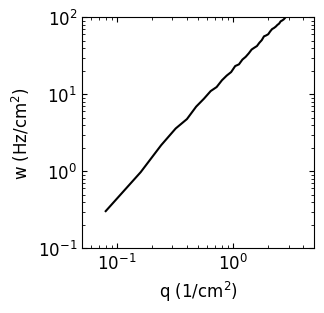

In [78]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst,color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [79]:
beep(4)

-n 
-n 
-n 
-n 


0

In [84]:
df_rates = pd.DataFrame(dict(
    N0=N0_lst,
    Tavg=Tavg_lst,
    q=q_lst,
    w=w_lst))
rate_dir = f"{nb_dir}/data/control_data/lpm_table1_lr_L_5.csv"
df_rates.to_csv(rate_dir,index=False)
rate_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_lr_L_5.csv'

In [86]:
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

In [88]:
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


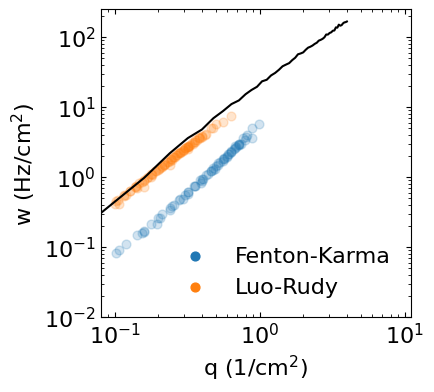

In [92]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [ ]:
#13 minutes with 1000 perturbations and cross-validation of training per call to routine
# npartitions = np.max((1,os.cpu_count()-1))
# npartitions = np.min((npartitions,len(task_lst)))
# print(f"evaluating tasks (estimated run time 80 minutes)...")
# print(f"evaluating {len(task_lst)} calls to gener_tbins_fast over {npartitions} cpu cores...")

In [100]:
# with Pool(processes=(os.cpu_count() - 1)) as pool:
#     retval = list(pool.map(routine, task_lst))

In [65]:
# pd.read_csv ( '/Users/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.34.33.csv' )


In [66]:
# 10.147 - 2*0.4158

In [ ]:
# task_str=f"{r:.5f} {D:.5f} {L} {kappa:.5f} {varkappa:.5f} {x0} {Dt} {dt} {Nmax} {niter} {reflect} {set_second} {no_repulsion} {no_attraction} {neighbor} {force_code}"


In [ ]:
#TODO: replot Fig. 2B
#TODO: print its inputs
#TODO: use the function to generate its xy values
#TODO: overlay the xy values